## ICP Autoencoder

### Muduaganti Nithin Reddy

In [8]:
import numpy as np

### Load and normalize our data

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


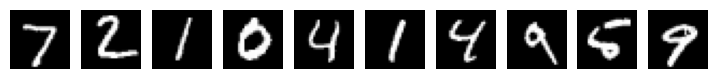

In [10]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Bottle Neck = 6

In [11]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 6)                 606       
                                                                 
 dense_12 (Dense)            (None, 100)               700       
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

Overall when the bottle neck value is set to 6, the model has compressed the image to very smaller size and the memory size will be reduced, so for the above code in the dense layers the total number of trainable parameters are 1,147,790, this is quite a big number, so we can analyze that the training has done to the maximum for the better output. 

### Train the autoencoder model.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 24s 47ms/step - loss: 0.2120 - val_loss: 0.1679
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1621 - val_loss: 0.1570
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1546 - val_loss: 0.1498
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1457 - val_loss: 0.1426
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1414 - val_loss: 0.1404
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1388 - val_loss: 0.1379
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1369 - val_loss: 0.1364
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1352 - val_loss: 0.1358
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1338 - val_loss: 0.1344
Epoch 10/10
469/469 [==============================] - 17s 37ms/step - loss: 0.132

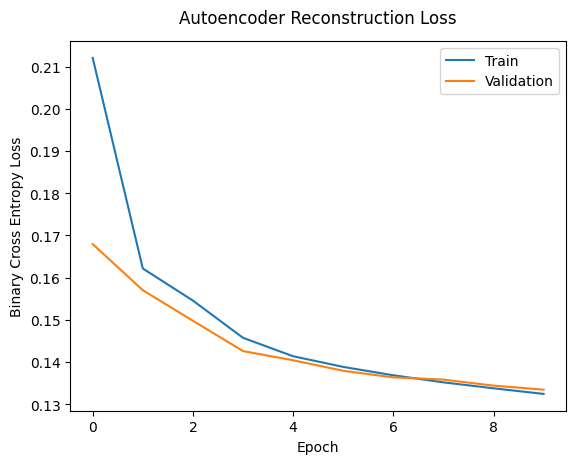

In [13]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

For reconstruction loss we can see that the graph has been declining towards the last epoch, but at the last epoch the validation data has surpassed the training data a bit.

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


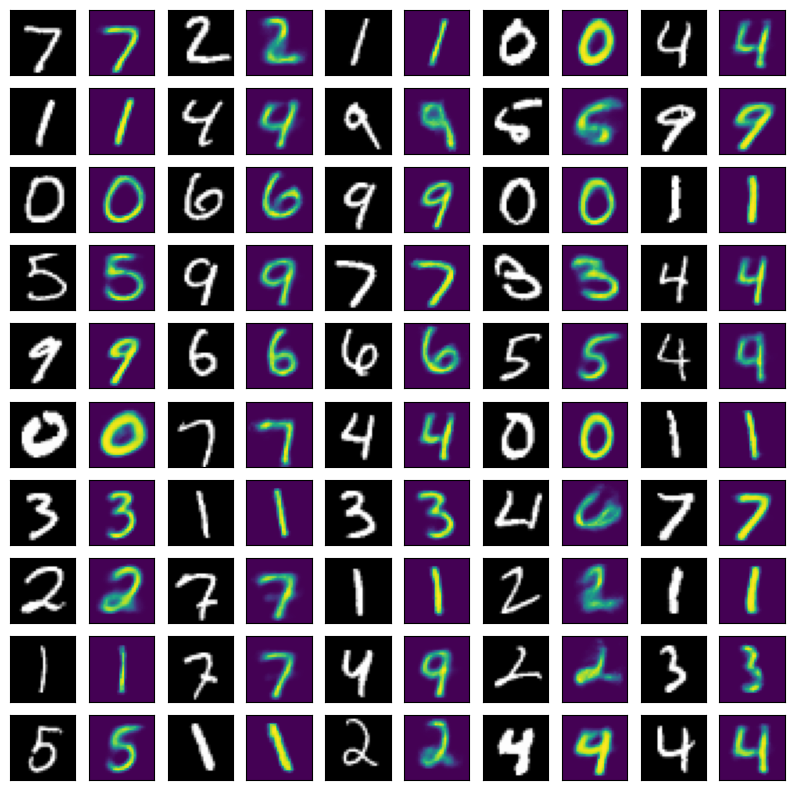

In [14]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [15]:
autoencoder.save('initially_trained_autoencoder_6.h5')

### Create an autoencoder model.
## Bottle neck 100

In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

When th ebottle neck has been increased to 100 the picture size is not smaller when compared to bottle neck 6, so the training parameters here have raised to 1166684 which is higher than the value for botttle neck 6, this is because when the picture size is big, it does more training parameters just to maximize the accuracy of the output for the very same reason we can see that the number of parameters are high for bittle neck 100.

### Train the autoencoder model.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 20s 40ms/step - loss: 0.1750 - val_loss: 0.1216
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1107 - val_loss: 0.1008
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0984 - val_loss: 0.0937
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0927 - val_loss: 0.0901
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0889 - val_loss: 0.0869
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0862 - val_loss: 0.0849
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0841 - val_loss: 0.0839
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0827 - val_loss: 0.0817
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0815 - val_loss: 0.0810
Epoch 10/10
469/469 [==============================] - 18s 38ms/step - loss: 0.080

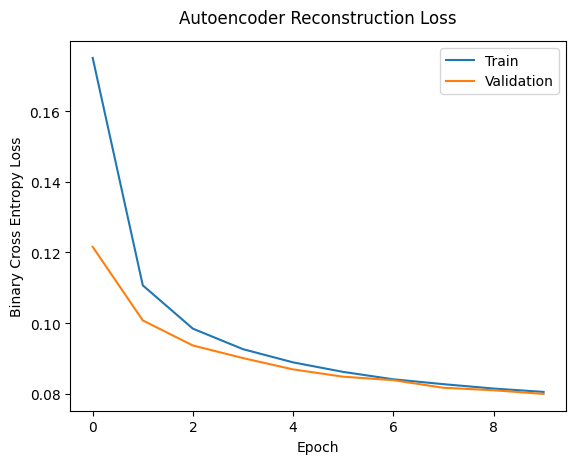

In [18]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

The graph shows that the reconstruction loss for bith training and validation datasets have been going hand in hand expect from apoch 4 the graph is slightly bounced up, this may occur because when the bottle neck is set to 100, the training parameters have increased while the system trys to build the accuracy from apoch 4, that means the hidden layers from epoch 4 shows the area of concentration for reconstruction loss.

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


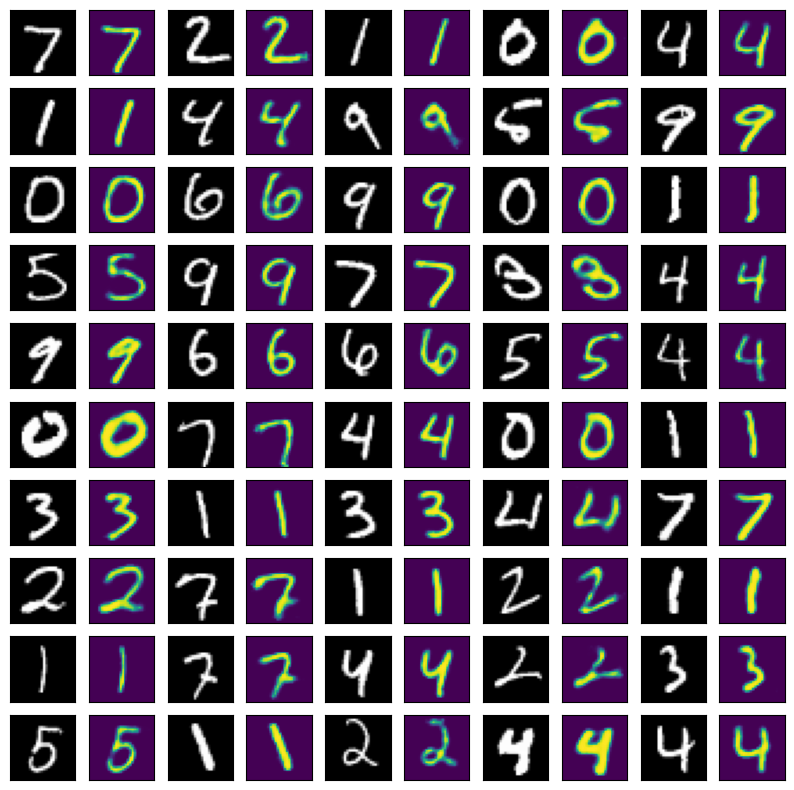

In [19]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [20]:
autoencoder.save('initially_trained_autoencoder_6.h5')

But what happens if we sent it something it has been trained on? Let’s try it out:

### Create an autoencoder model.

### Summary

Since the new image wasn't part of the original training dataset, it's seen as an 'anomoly' by the autoencoder. This is indicated by the difference (error) betweem the original image and the reconstructed image.